# Data Analysis of Acoustics Experiments


### Folder: 6 units with Aperture, 7 units with Aperture

(c) Benjamin Cichos 2019

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.interpolate
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from scipy.signal import find_peaks



%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 14,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',})  

## Data for the tube with different length and apertures

In [3]:
freq6,amp6=np.loadtxt('6_units_with_aperture/6_units_with_aperture',unpack=True)
peaks6, _ = find_peaks(amp6, distance=15,threshold=1000)
freq7,amp7=np.loadtxt('7_units_with_aperture/7_units_with_aperture',unpack=True)
peaks7, _ = find_peaks(amp7, distance=15,threshold=1000)
#freq8,amp8=np.loadtxt('8_units_with_aperture/8_units_with_aperture',unpack=True)

In [4]:
freq6h=np.array([530,690,990,1310,1650,1920,3590,3690,3930,4180,4420,4560,7000,7080,7220,7400,7500,7620])
freq7h=np.array([440,610,890,1170,1470,1750,1950,3550,3660,3830,4060,4260,4460,4560,6950,7060,7160,7300,7430,7520,7620])

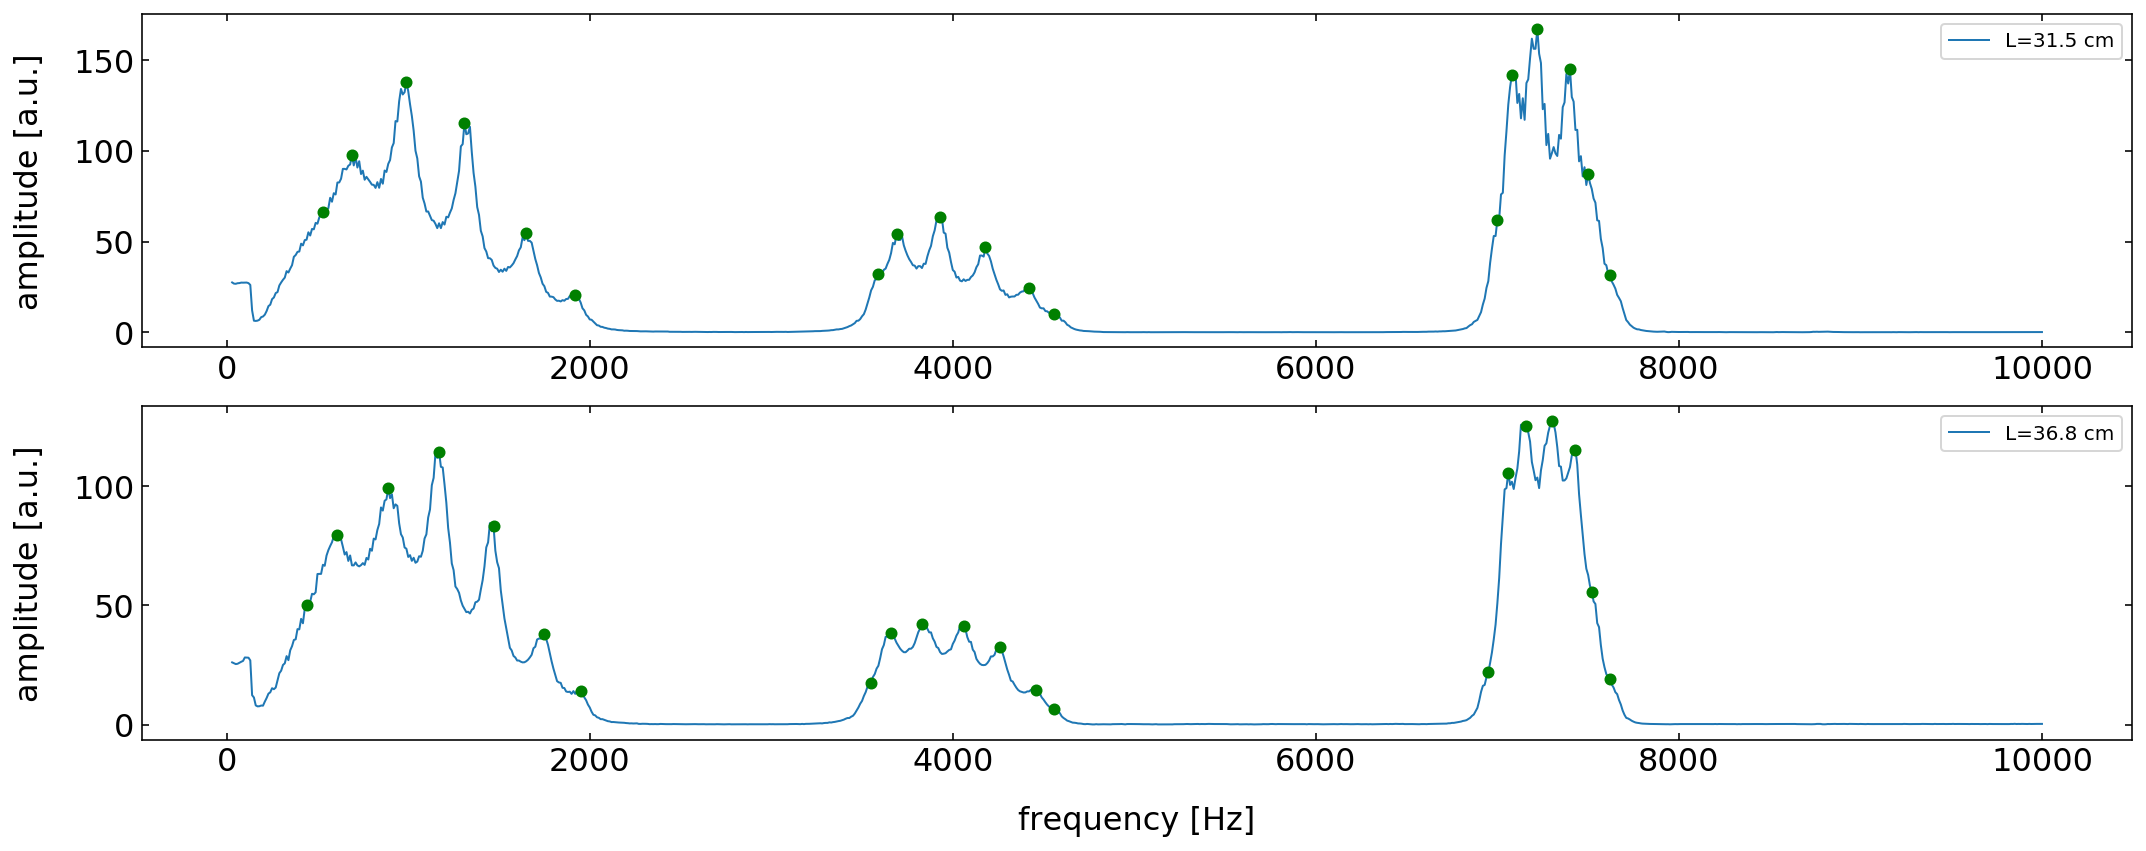

In [5]:
fig=plt.figure(figsize=(15,6))
ax=fig.gca()
plt.subplot(211)
plt.plot(freq6,amp6/10000,label='L=31.5 cm')
plt.legend()
#plt.plot(freq6[peaks6[1:]],amp6[peaks6[1:]]/10000,'.')

[plt.plot(freq6h[i],amp6[int(np.where(freq6==freq6h[i])[0])]/10000,'g.',label='L=42.1 cm') for i in range(len(freq6h))]
plt.ylabel('amplitude [a.u.]')


plt.subplot(212)
plt.plot(freq7,amp7/10000,label='L=36.8 cm')
plt.legend()

[plt.plot(freq7h[i],amp7[int(np.where(freq7==freq7h[i])[0])]/10000,'g.') for i in range(len(freq7h))]
plt.ylabel('amplitude [a.u.]')
#plt.plot(freq8,amp8/10000,label='8 units')
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude [a.u.]')
plt.ticklabel_format(axis='both',style='sci')
plt.tight_layout()
plt.savefig('spectra_with_aperture.pdf')
plt.show()

## Dispersion relation

The dispersion relation plots the peak frequencies of the frequency scan as a function of the wavenumber. To make that plot, we have to determine the wavenumbers for the peaks. Since the tube is a resonator, we can have standing waves whenever 

\begin{equation}
k=n\frac{\pi}{L}
\end{equation}

with $n=1,2,3,\ldots$ and $L$ being the length of the tube.

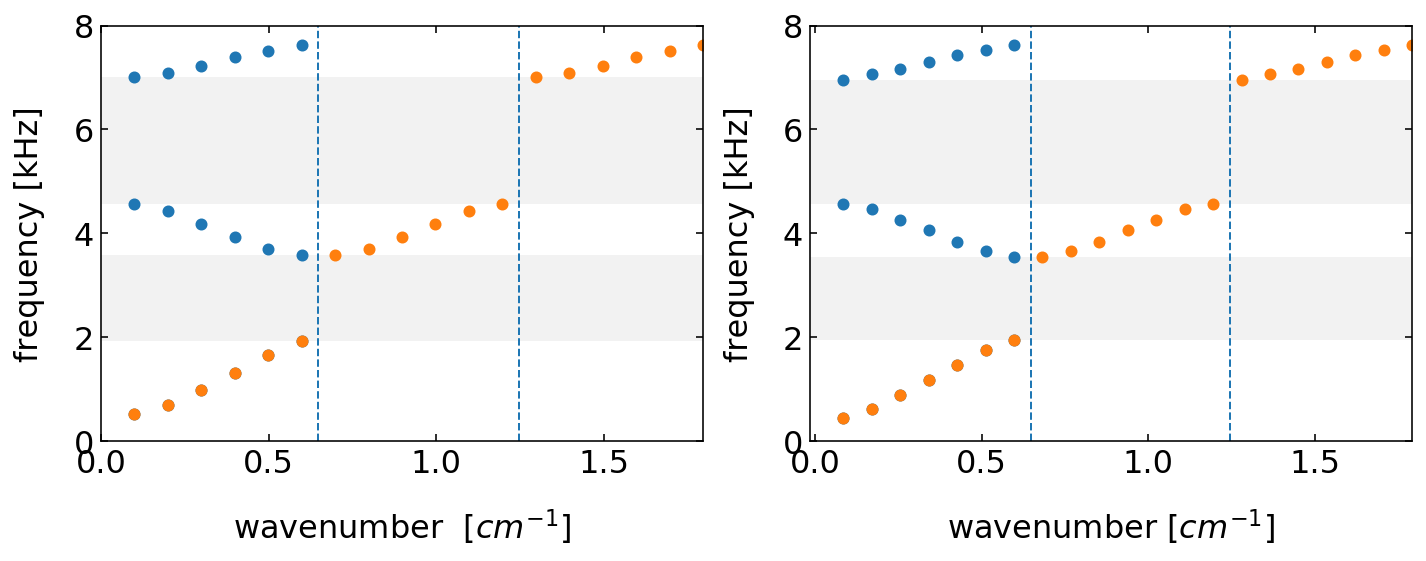

In [6]:
fig=plt.figure(figsize=(10,4))
plt.subplot(121)
k6=np.arange(1,len(freq6h)+1)*np.pi/(30+1.5)
k=list(k6[0:6])
k6n=np.array(k+k[::-1]+k)
plt.plot(k6n,np.array(freq6h)/1000,'.')
plt.plot(k6,np.array(freq6h)/1000,'.')
wn=np.linspace(k6.min()-0.1,k6.max(),10)
plt.xlim(k6.min()-0.1,k6.max())
plt.fill_between(wn, freq6h[5]/1000, freq6h[6]/1000,facecolor='gray',alpha=0.1)
plt.fill_between(wn, freq6h[11]/1000, freq6h[12]/1000,facecolor='gray',alpha=0.1)
plt.axvline(x=6.5*np.pi/(30+1.5),ls='--')
plt.axvline(x=12.5*np.pi/(30+1.5),ls='--')
plt.ylim(0,8)
plt.ylabel('frequency [kHz]')
plt.xlabel('wavenumber  [$cm^{-1}$]')

plt.subplot(122)
k7=np.arange(1,len(freq7h)+1)*np.pi/(35+1.8)
k=list(k7[0:7])
k7n=k+k[::-1]+k
plt.plot(k7n,np.array(freq7h)/1000,'.')
plt.plot(k7,np.array(freq7h)/1000,'.')
wn=np.linspace(k7.min()-0.1,k7.max(),10)
plt.xlim(k7.min()-0.1,k7.max())
plt.fill_between(wn, freq7h[6]/1000, freq7h[7]/1000,facecolor='gray',alpha=0.1)
plt.fill_between(wn, freq7h[13]/1000, freq7h[14]/1000,facecolor='gray',alpha=0.1)
plt.axvline(x=6.5*np.pi/(30+1.5),ls='--')
plt.axvline(x=12.5*np.pi/(30+1.5),ls='--')
plt.ylim(0,8)
plt.ylabel('frequency [kHz]')
plt.xlabel('wavenumber [$cm^{-1}$]')
plt.tight_layout()
#plt.savefig('band_structure_graph.pdf')
plt.show()

In [7]:
def dispersion(alpha):
    beta=40
    b=0.01
    a=1
    disp=(beta**2-alpha**2)*np.sinh(beta*b)*np.sin(alpha*a)/(2*alpha*beta)+np.cosh(beta*b)*np.cos(alpha*a)
    return(disp)

In [8]:
x=np.linspace(-4*np.pi,4*np.pi,10000)
w=dispersion(x)

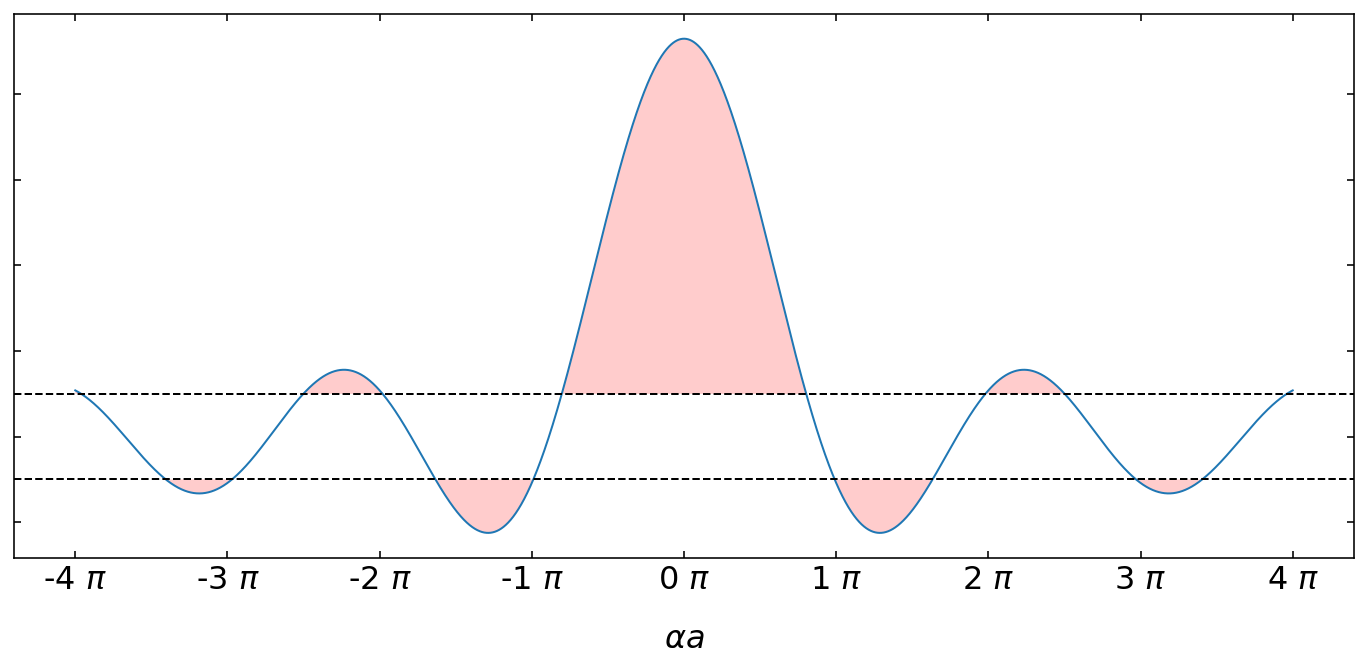

In [9]:
import matplotlib.ticker as tck

fig=plt.figure(figsize=(12,5))
ax=fig.gca()
plt.plot(x/np.pi,w)
plt.axhline(y=-1,ls='--',color='k')
plt.axhline(y=1,ls='--',color='k')
ax.fill_between(x/np.pi, np.where(w>1,w,1), 1,facecolor='red',alpha=0.2)
ax.fill_between(x/np.pi, np.where(w<-1,w,-1), -1,facecolor='red',alpha=0.2)
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.axes.yaxis.set_ticklabels([])
plt.xlabel(r'$\alpha a$')
#plt.savefig('bandgaps.pdf')

plt.show()

In [10]:
k=np.arccos(w)/(1+0.01)
E=x**2/2*0.1

/Users/b.cichos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.


In [11]:
Ea=np.flip(E[:5000])
ka=np.flip(k[:5000])

In [12]:
inc=np.array([False]+list(np.diff(~np.isnan(ka),1)))

In [13]:
offset=0
off=0
kc=ka.copy()
for i,kv in enumerate(ka):
    if inc[i]==True:
        offset=offset+1
        off=(offset-1)*np.pi/2
    if int(off/np.pi)==1 or int(off/np.pi)==3:
        kc[i]=off+np.pi-kv
    else:
        kc[i]=kv+off
        

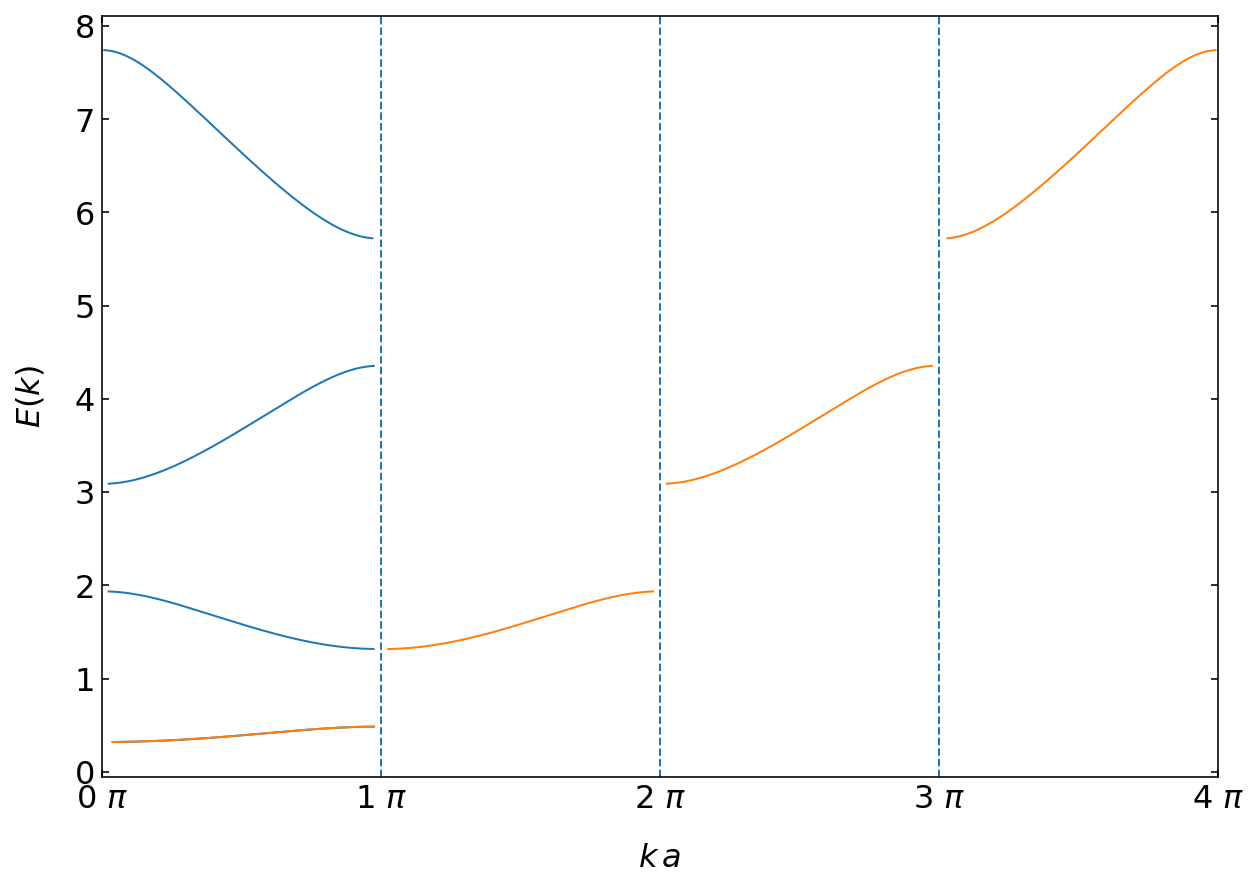

In [14]:
fig=plt.figure(figsize=(10,7))
ax=fig.gca()
plt.plot(ka/np.pi,Ea)
plt.plot(kc/np.pi,Ea)
[plt.axvline(i,ls='--') for i in range(1,4)]
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
plt.xlabel(r'$k\, a$')
plt.ylabel(r'$E(k)$')
plt.xlim(0,4)
plt.savefig('bandstructure_theory.pdf')
plt.show()